<h1>Exercise 3.1 - Hasan Haq</h1>

<b>Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 
in the household. 

Now compute the biased distribution we would see if we surveyed the children and asked them how 
many children under 18 (including themselves) are in their household. 

Plot the actual and biased distributions, 
and compute their means. As a starting place, you can use chap03ex.ipynb.</b>

In [28]:
# Import the modules needed to complete this exercise

import numpy as np

import nsfg
import thinkstats2
import thinkplot

In [29]:
# Load NSFG database

resp = nsfg.ReadFemResp()

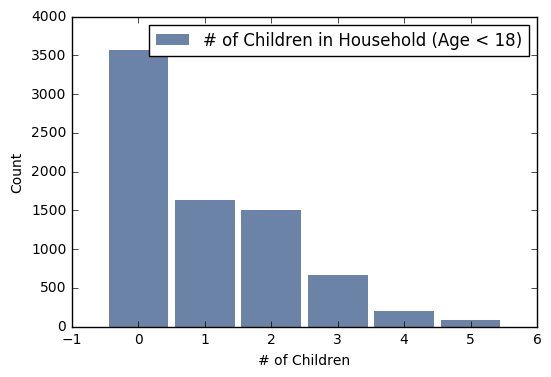

In [30]:
# Plot the distribution of children under 18

hist = thinkstats2.Hist(resp.numkdhh, label='# of Children in Household (Age < 18)')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# of Children', ylabel='Count')

In [31]:
# Create the probability mass function which we will use to find the biased data

pmf = thinkstats2.Pmf(resp['numkdhh'], label='actual')

print(pmf)

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})


In [32]:
# Create function to compute the biased distribution

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

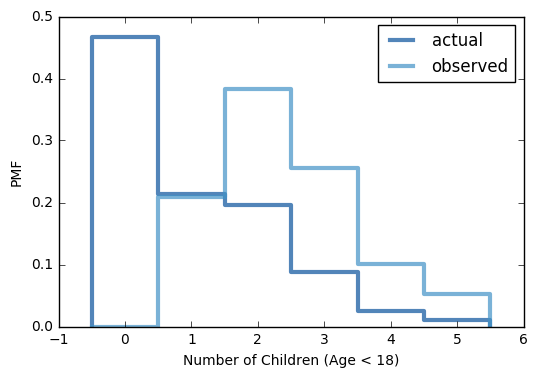

In [33]:
# Plot the actual and observed distributions

biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Number of Children (Age < 18)', ylabel='PMF')

<b>The observed mean is much higher because there will be more respondents from people with greater number of children in a family.</b>

In [34]:
# Compute the means of both distributions

print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.02420515504
Observed mean 2.40367910066
